## MOEA/D


<cite data-cite="moead"></cite>

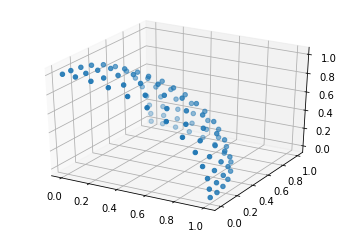

In [4]:
from pymoo.optimize import minimize
from pymoo.factory import get_algorithm
from pymoo.util import plotting
from pymop.factory import get_problem, UniformReferenceDirectionFactory

# create the optimization problem
problem = get_problem("dtlz2")
ref_dirs = UniformReferenceDirectionFactory(3, n_points=100).do()

method = get_algorithm("moead",
                        ref_dirs = ref_dirs, 
                        n_neighbors = 15,
                        decomposition = "pbi",
                        prob_neighbor_mating = 0.7
                       )

res = minimize(problem,
               method,
               termination=('n_gen', 200)
              )

plotting.plot(res.F)


$$
\begin{figure}
  \centering
  {\includegraphics[width=2.5in]{../resources/images/nsga2_survival.png}}
  \caption{Comparing Dq from different p-model}
  \end{figure}$$

In [5]:
from __future__ import print_function
from IPython.core.magic import Magics, magics_class, line_magic, cell_magic
from IPython.core import interactiveshell


def load(fname, block=None):
    with open(fname) as f:
            source = f.read()
            
    if block:
        left = "##START %s" % block
        right = "##END %s" % block
        source = source[source.index(left)+len(left):source.index(right)]
        
    source = source.strip()

    return source
    

@magics_class
class MyMagics(Magics):

    @line_magic
    def run_and_load(self, line):
        line = line.replace('\'', '').replace("\"", '')
        fname, block = line.split(":")
        source = load(fname, block)
        header = "%run_and_load '{}'".format(line)
        self.shell.set_next_input("%s\n\n%s" % (header, source), replace=True)
        self.shell.run_cell(source)

        
ip = get_ipython()
ip.register_magics(MyMagics)



In [ ]:
%run_and_load '../../../pymoo/usage/crossover.py:SBX1'

from pymoo.interface import crossover
from pymoo.factory import get_crossover
import numpy as np
import matplotlib.pyplot as plt


def show(eta_cross):
    a, b = np.full((5000, 1), 0.2), np.full((5000, 1), 0.8)
    off = crossover(get_crossover("real_sbx", prob=1.0, eta=eta_cross, prob_per_variable=1.0), a, b)

    plt.hist(off, range=(0, 1), bins=200, density=True, color="red")
    plt.show()


show(5)